In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Veri Seti Olusturma

#kume 1
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)

#kume 2
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

#kume 3
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

x = np.concatenate((x1,x2,x3),axis=0)
y = np.concatenate((x1,x2,x3),axis=0)

dictionary = {"x":x,
              "y":y}

data = pd.DataFrame(dictionary)
data.head()

,x,y
0,30.093134,30.093134
1,21.222174,21.222174
2,22.808306,22.808306
3,21.499468,21.499468
4,24.540681,24.540681


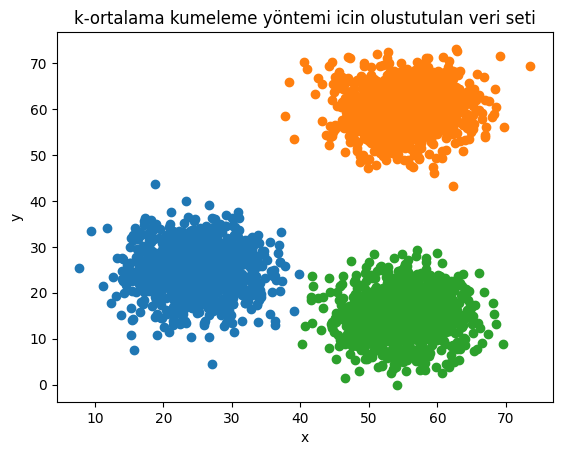

In [3]:
plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("k-ortalama kumeleme yöntemi icin olustutulan veri seti")
plt.show()

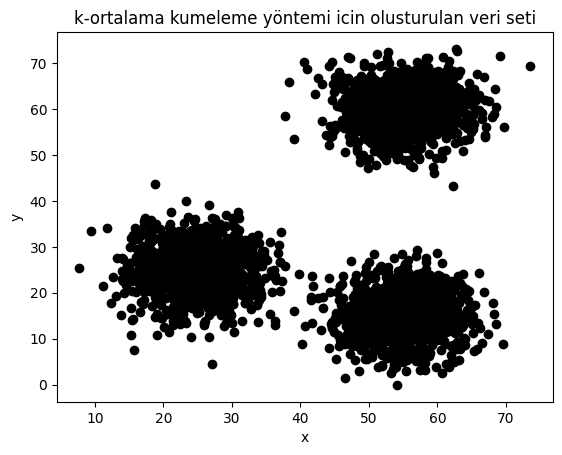

In [4]:
# k ortalama algoritması veriyi böyle gorecek
plt.figure()
plt.scatter(x1,y1,color="black")
plt.scatter(x2,y2,color="black")
plt.scatter(x3,y3,color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("k-ortalama kumeleme yöntemi icin olusturulan veri seti")
plt.show()

# k degerinin seçimi
*  k degerinin seçmek için dirsek yönetimini kullanacağız
* bu yönteme gör en uygun k değeri dirsek görünümünü oluştuğu  bölgedeki k degeridir.

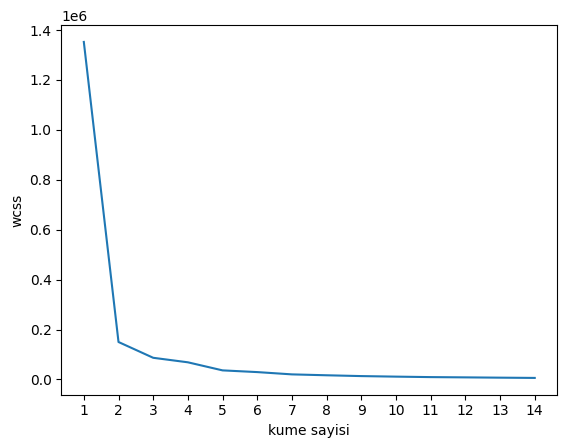

In [5]:
# k ortalamayi ice aktarma

from sklearn.cluster import KMeans # kümeleme kütüphanesidir.
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k) # k-means modeli olusturulur.
    kmeans.fit(data) # gözetimsiz eğitim degiskeni bu yüzden train test yok.
    wcss.append(kmeans.inertia_) # k-means modelinin hata değerini listesine ekler.

plt.figure()
plt.plot(range(1,15),wcss)
plt.xticks(range(1,15))
plt.xlabel("kume sayisi")
plt.ylabel("wcss")
plt.show()


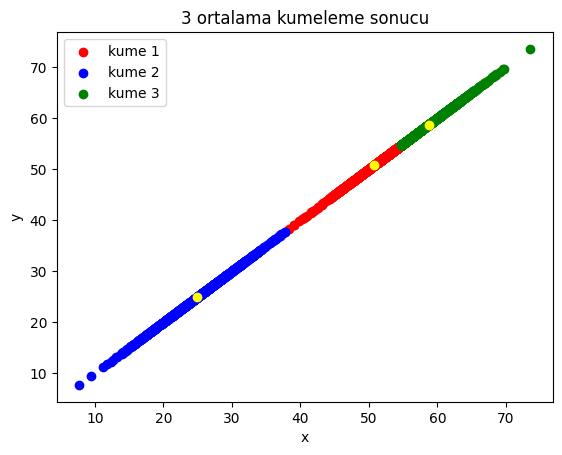

In [6]:
# hata var
k_ortalama = KMeans(n_clusters=3) # k-means algoritmasında kullanılan küme sayisi. 3 adet verildi.
kumeler = k_ortalama.fit_predict(data) # verilerin hangi kümeye ait olduğunu gösterir.

data["label"] = kumeler

plt.figure()
plt.scatter(data.x[data.label == 0],data.y[data.label == 0], color="red", label = "kume 1")
plt.scatter(data.x[data.label == 1],data.y[data.label == 1], color="blue", label = "kume 2")
plt.scatter(data.x[data.label == 2],data.y[data.label == 2], color="green", label = "kume 3")
plt.scatter(k_ortalama.cluster_centers_[:,0],k_ortalama.cluster_centers_[:,1],color ="yellow")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("3 ortalama kumeleme sonucu")
plt.show()